<a href="https://colab.research.google.com/github/UdalovIA/Data_Mining_Lab/blob/main/Lab_03_IAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторная работа № 3


СРАВНИТЕЛЬНЫЙ АНАЛИЗ МЕТОДОВ КЛАССИФИКАЦИИ ДАННЫХ


Описание датасетов


1. Набор данных «Iris Data Set» – «Ирисы Фишера» (см. Л.Р.№1). 


Задание на лабораторную работу


1. Провести снижение размерности методами МГК (PCA) и t-sne. Сделать предположение о разделимости выборки на классы. В отчёт включить все графики и вывод о разделимости.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import scipy
iris = load_iris()
iris_pd=pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
#import pingouin as pg
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


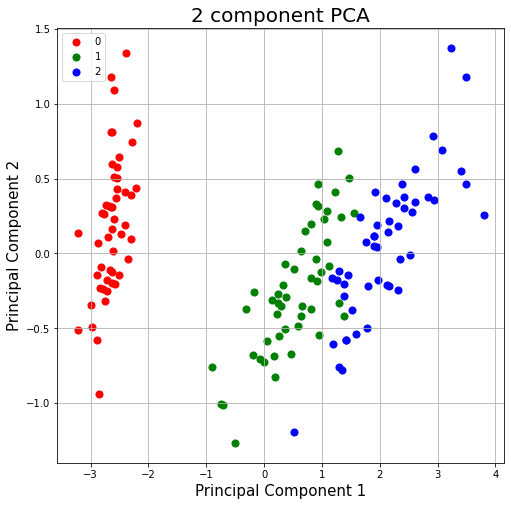

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = iris_pd.drop(columns=['target'])
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, iris_pd[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


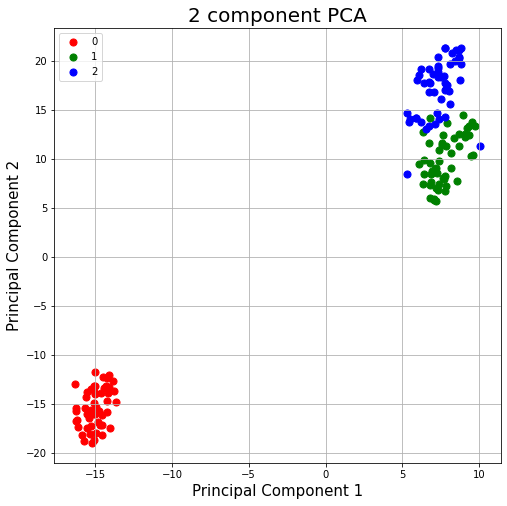

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_Components = tsne.fit_transform(data)
tsne_Df = pd.DataFrame(data = tsne_Components
             , columns = ['Component 1', 'Component 2'])
finalDf = pd.concat([tsne_Df, iris_pd[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Component 1']
               , finalDf.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Вывод по разделимости:
Красные хорошо отделяются от остальных
Синие и зеленые имеют пересечения, что может быть обусловлено случайностью, разделение можно провести, но с погрешностью.

2. Провести классификацию (с параметрами по умолчанию) (KNN, Logistic Regression, Random Forest, Decision Tree). Проводить обучения классификатора следует с использованием кросс-валидации. Так же требуется разделить выборку на тестовую и обучающую. Так же требуется получить данные о качестве классификации (Accuracy, Precision, Recall и F1-мера). После обучения требуется визуализировать тестовую выборку:
 1. С исходными метками
 2. С метками полученными при классификации
В отчёт включить оба графика. Сделать выводы о качестве классификации.


Разбиение выборки

In [5]:
finalDf

,Component 1,Component 2,target
0,-15.006946,-16.039494,0.0
1,-15.262831,-13.499227,0.0
2,-14.433534,-13.353337,0.0
3,-14.288446,-13.152991,0.0
4,-14.562841,-16.120075,0.0
...,...,...,...
145,6.819870,17.719976,2.0
146,7.222439,14.633404,2.0
147,7.081556,16.818169,2.0
148,5.918749,18.018387,2.0


In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(finalDf, test_size=0.2)

In [7]:
from sklearn.model_selection import cross_validate

def vis_data(X,Y,X_t, Y_t, pred, pred_t):
    pred = pd.Series(pred)
    pred_t = pd.Series(pred_t)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    fig.suptitle('Data')
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    # train original
    Df = pd.DataFrame(data = X
                , columns = ['Component 1', 'Component 2'])
    finalDf = pd.concat([Df, Y], axis = 1)
    ax1.set_xlabel('Component 1', fontsize = 15)
    ax1.set_ylabel('Component 2', fontsize = 15)
    ax1.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax1.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                  , finalDf.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax1.legend(targets)
    ax1.grid()

    # train pred

    Df = pd.DataFrame(data = X.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred
    fig = plt.figure(figsize = (8,8))
    ax2.set_xlabel('Component 1', fontsize = 15)
    ax2.set_ylabel('Component 2', fontsize = 15)
    ax2.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax2.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax2.legend(targets)
    ax2.grid()

    # test original

    Df = pd.DataFrame(data = X_t
                , columns = ['Component 1', 'Component 2'])
    finalDf = pd.concat([Df, Y_t], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax3.set_xlabel('Component 1', fontsize = 15)
    ax3.set_ylabel('Component 2', fontsize = 15)
    ax3.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax3.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                  , finalDf.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax3.legend(targets)
    ax3.grid()

    # test pred
    
    Df = pd.DataFrame(data = X_t.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred_t
    fig = plt.figure(figsize = (8,8))
    ax4.set_xlabel('Component 1', fontsize = 15)
    ax4.set_ylabel('Component 2', fontsize = 15)
    ax4.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax4.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax4.legend(targets)
    ax4.grid()

def my_cross_val(X,Y, model,metrics,cv=4):
    cv_results = cross_validate(model, X, Y, cv= cv, scoring=metrics)
    neigh.predict
    cv_results
    return cv_results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def train_model(train,test, model, metrics = ['accuracy', 'precision_weighted','recall_weighted','f1_weighted'] ):
    X = train.drop(columns=['target'])
    Y = train['target']
    X_t = test.drop(columns=['target'])
    Y_t = test['target']
    metrics = my_cross_val(X,Y, model, metrics)
    model.fit(X, Y)
    answers_t = model.predict(X_t)
    answers = model.predict(X)
    metrics_test = []
    metrics_test.append(accuracy_score(Y_t, answers_t))
    metrics_test.append(precision_score(Y_t, answers_t, average='weighted'))
    metrics_test.append(recall_score(Y_t, answers_t, average='weighted'))
    metrics_test.append(f1_score(Y_t, answers_t, average='weighted'))

    vis_data(X, Y, X_t,Y_t,answers,answers_t )
    return model, metrics, metrics_test

    


(KNeighborsClassifier(),
 {'fit_time': array([0.00532699, 0.00301027, 0.0031302 , 0.00318384]),
  'score_time': array([0.00976133, 0.00910902, 0.00970173, 0.01301408]),
  'test_accuracy': array([0.93333333, 1.        , 0.93333333, 1.        ]),
  'test_precision_weighted': array([0.94444444, 1.        , 0.93333333, 1.        ]),
  'test_recall_weighted': array([0.93333333, 1.        , 0.93333333, 1.        ]),
  'test_f1_weighted': array([0.93265993, 1.        , 0.93333333, 1.        ])},
 [0.9666666666666667,
  0.9694444444444444,
  0.9666666666666667,
  0.9664109121909632])

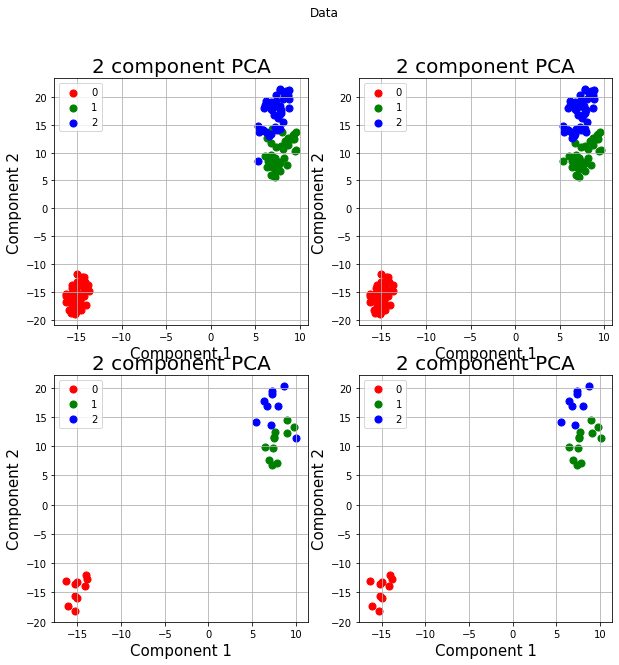

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
ans = train_model(train, test, neigh)
ans

(LogisticRegression(),
 {'fit_time': array([0.02617955, 0.03797317, 0.03184843, 0.05929685]),
  'score_time': array([0.00816512, 0.00751114, 0.01448631, 0.00869584]),
  'test_accuracy': array([0.93333333, 1.        , 0.96666667, 1.        ]),
  'test_precision_weighted': array([0.94444444, 1.        , 0.96969697, 1.        ]),
  'test_recall_weighted': array([0.93333333, 1.        , 0.96666667, 1.        ]),
  'test_f1_weighted': array([0.93265993, 1.        , 0.96658312, 1.        ])},
 [0.9666666666666667,
  0.9694444444444444,
  0.9666666666666667,
  0.9664109121909632])

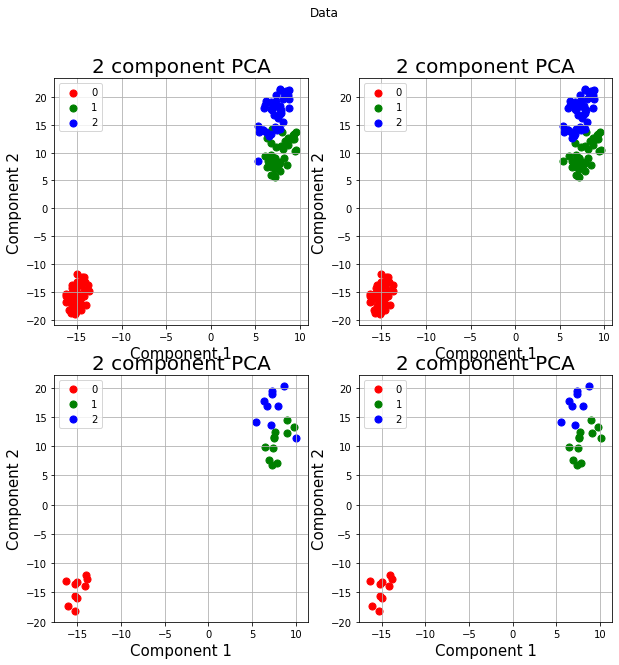

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
ans = train_model(train, test, model)
ans

(RandomForestClassifier(),
 {'fit_time': array([0.23223424, 0.32858443, 0.26717234, 0.22790122]),
  'score_time': array([0.02569842, 0.03170204, 0.0432055 , 0.02360129]),
  'test_accuracy': array([0.96666667, 0.96666667, 0.86666667, 1.        ]),
  'test_precision_weighted': array([0.96969697, 0.96969697, 0.875     , 1.        ]),
  'test_recall_weighted': array([0.96666667, 0.96666667, 0.86666667, 1.        ]),
  'test_f1_weighted': array([0.96658312, 0.96658312, 0.86531987, 1.        ])},
 [0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333])

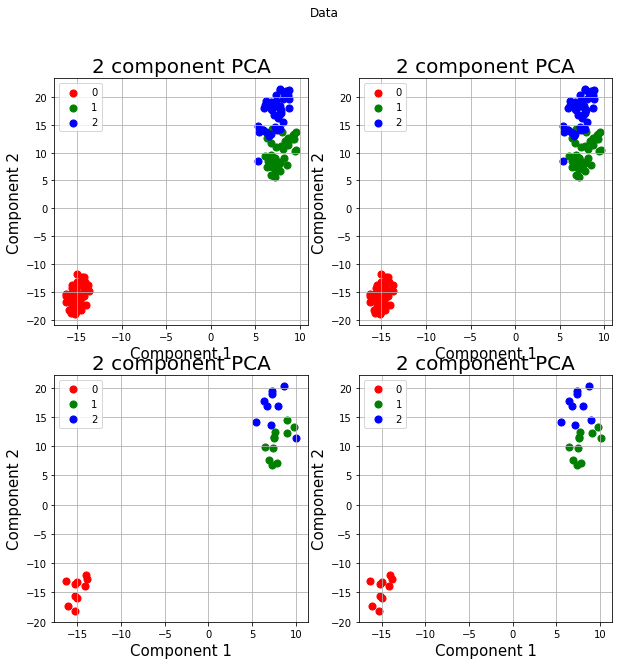

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
ans = train_model(train, test, model)
ans

(LogisticRegression(),
 {'fit_time': array([0.05574965, 0.03327537, 0.04340339, 0.03005719]),
  'score_time': array([0.00827217, 0.01554322, 0.00788856, 0.00766778]),
  'test_accuracy': array([0.93333333, 1.        , 0.96666667, 1.        ]),
  'test_precision_weighted': array([0.94444444, 1.        , 0.96969697, 1.        ]),
  'test_recall_weighted': array([0.93333333, 1.        , 0.96666667, 1.        ]),
  'test_f1_weighted': array([0.93265993, 1.        , 0.96658312, 1.        ])},
 [0.9666666666666667,
  0.9694444444444444,
  0.9666666666666667,
  0.9664109121909632])

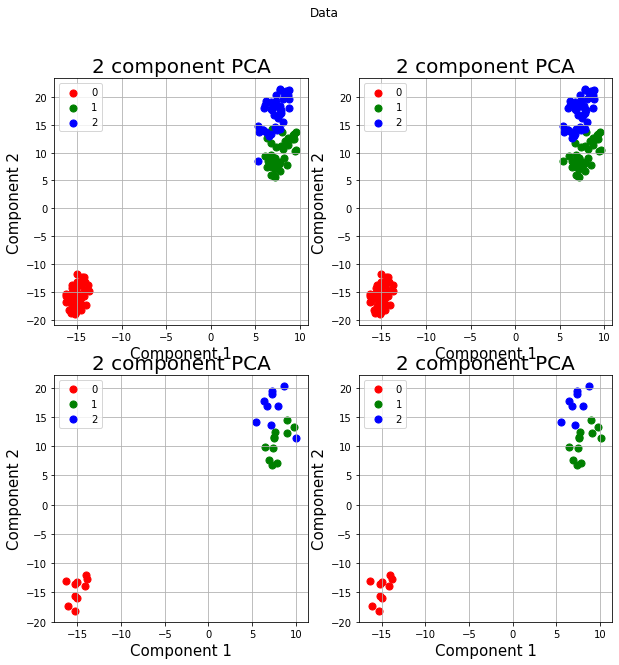

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression()
ans = train_model(train, test, model)
ans

(SVC(),
 {'fit_time': array([0.0064218 , 0.00378394, 0.00338197, 0.00363111]),
  'score_time': array([0.00788689, 0.00651073, 0.00761271, 0.01439285]),
  'test_accuracy': array([0.96666667, 0.96666667, 0.93333333, 0.96666667]),
  'test_precision_weighted': array([0.96969697, 0.96969697, 0.94444444, 0.97      ]),
  'test_recall_weighted': array([0.96666667, 0.96666667, 0.93333333, 0.96666667]),
  'test_f1_weighted': array([0.96658312, 0.96658312, 0.93265993, 0.96675021])},
 [0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333])

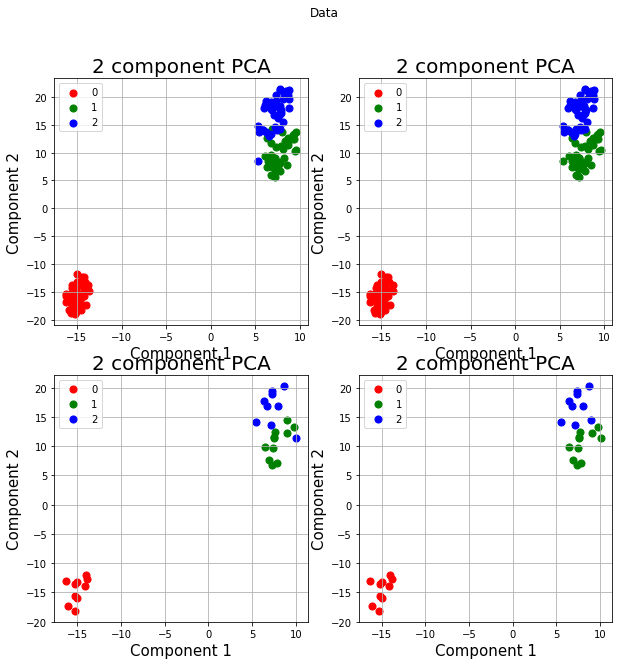

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [11]:
from sklearn import svm
model = svm.SVC()
ans = train_model(train, test, model)
ans

(GradientBoostingClassifier(),
 {'fit_time': array([0.43294978, 0.5100286 , 0.53981638, 0.60187531]),
  'score_time': array([0.00864625, 0.00872207, 0.00889778, 0.00721931]),
  'test_accuracy': array([0.93333333, 0.9       , 0.83333333, 0.96666667]),
  'test_precision_weighted': array([0.94444444, 0.9023569 , 0.84981685, 0.97      ]),
  'test_recall_weighted': array([0.93333333, 0.9       , 0.83333333, 0.96666667]),
  'test_f1_weighted': array([0.93265993, 0.89974937, 0.82949702, 0.96675021])},
 [0.9, 0.9013888888888889, 0.9, 0.8992327365728899])

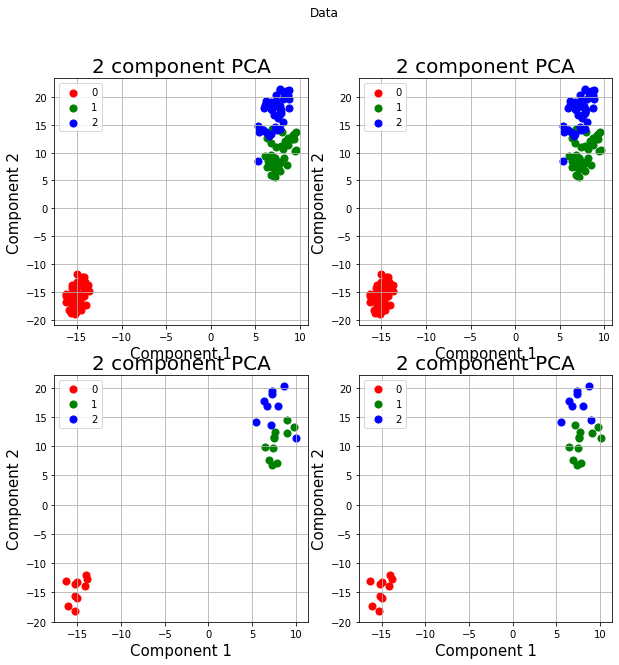

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
ans = train_model(train, test, model)
ans

(GradientBoostingClassifier(),
 {'fit_time': array([0.44932961, 0.54500484, 0.3893826 , 0.36837578]),
  'score_time': array([0.00763106, 0.01033759, 0.01952767, 0.00748348]),
  'test_accuracy': array([0.93333333, 0.9       , 0.83333333, 0.96666667]),
  'test_precision_weighted': array([0.94444444, 0.9023569 , 0.84981685, 0.97      ]),
  'test_recall_weighted': array([0.93333333, 0.9       , 0.83333333, 0.96666667]),
  'test_f1_weighted': array([0.93265993, 0.89974937, 0.82949702, 0.96675021])},
 [0.9, 0.9013888888888889, 0.9, 0.8992327365728899])

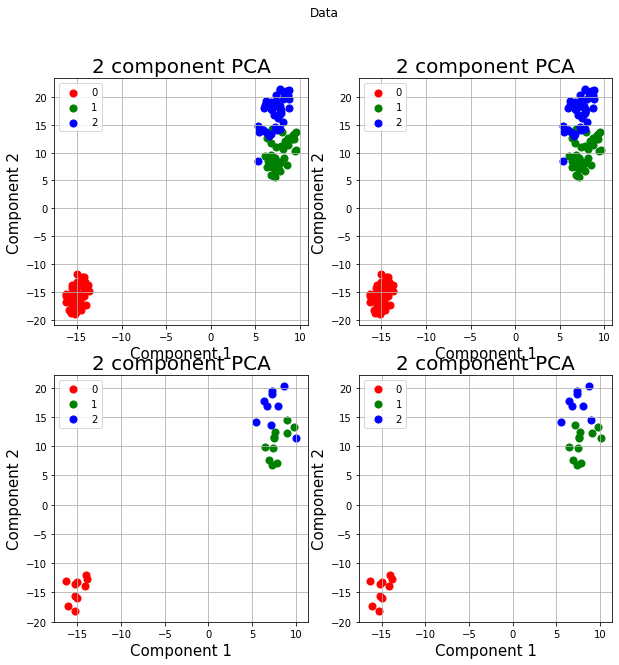

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
ans = train_model(train, test, model)
ans

Качество классификации на высоком уровне - нет ошибок на тестовой выборке

3. Провести настройку параметров классификаторов с использованием gridsearchcv. Результаты настройки сохранить для следующего пункта. (При защите будет уделяться особое внимание параметрам классификации (обязательно знать, что каждый параметр обозначает) и принципу их обучения и работы)

In [14]:
from sklearn.model_selection import GridSearchCV
X = train.drop(columns=['target'])
Y = train['target']

In [29]:
parameters = {
  'n_neighbors' : (list(range(1, 30))),
  'weights' : ('uniform', 'distance'), 
  'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'), 
  'p' : [1,2,3,5,10,100],
  'metric' : ('minkowski', 'cityblock' , 'euclidean', 'manhattan')
}
neigh = KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters)
clf.fit(X, Y)
clf.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 3,
 'p': 3,
 'weights': 'distance'}

In [30]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model = LogisticRegression()
clf = GridSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following

{'C': 0.1, 'penalty': 'l2'}

In [40]:
grid={'criterion' : ['gini', 'entropy'],
      "splitter":["best","random"],
      'min_samples_split': list(range(2,20))
      }

model = DecisionTreeClassifier()
clf = GridSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

{'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}

In [41]:
grid={"C":np.logspace(-3,3,7),
      "kernel":["linear","poly","rbf","sigmoid" ],
      'degree': list(range(1,9)),
      }
model = svm.SVC()
clf = GridSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

{'C': 0.1, 'degree': 1, 'kernel': 'linear'}

In [63]:
grid={"learning_rate":np.linspace(0,10,100),
      "n_estimators":list(range(1,200, 20)),
      }
model = GradientBoostingClassifier()
clf = GridSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 275, in _check_params
    "learning_rate must be greater than 0 but was %r" % self.learning_rate
ValueError: learning_rate 

{'learning_rate': 0.8080808080808081, 'n_estimators': 21}

In [62]:
grid={"n_estimators":list(range(1,300, 50)),
      "max_depth":list(range(10,100, 5))
      }
model = RandomForestClassifier()
clf = GridSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

{'max_depth': 55, 'n_estimators': 1}

4. Провести классификацию (с параметрами из предыдущего пункта). После обучения требуется визуализировать тестовую выборку:
С исходными метками
С метками полученными при классификации (пункт 2)
С метками полученными при классификации
В отчёт включить все графики. Сделать выводы о качестве классификации. Сравнить с результатами 2 пункта.


In [53]:
def vis_data_2(X,Y,X_t, Y_t, pred, pred_t,pred_param, pred_t_param ):
    pred = pd.Series(pred)
    pred_t = pd.Series(pred_t)
    fig, ((ax1, ax2, ax22), (ax3, ax4, ax44)) = plt.subplots(2, 3)
    fig.suptitle('Data')
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    # train original
    Df = pd.DataFrame(data = X
                , columns = ['Component 1', 'Component 2'])
    finalDf = pd.concat([Df, Y], axis = 1)
    ax1.set_xlabel('Component 1', fontsize = 15)
    ax1.set_ylabel('Component 2', fontsize = 15)
    ax1.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax1.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                  , finalDf.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax1.legend(targets)
    ax1.grid()

    # train pred

    Df = pd.DataFrame(data = X.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred
    fig = plt.figure(figsize = (8,8))
    ax2.set_xlabel('Component 1', fontsize = 15)
    ax2.set_ylabel('Component 2', fontsize = 15)
    ax2.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax2.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax2.legend(targets)
    ax2.grid()

    # train pred_metr

    Df = pd.DataFrame(data = X.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred_param
    fig = plt.figure(figsize = (8,8))
    ax22.set_xlabel('Component 1', fontsize = 15)
    ax22.set_ylabel('Component 2', fontsize = 15)
    ax22.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax22.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax22.legend(targets)
    ax22.grid()

    # test original

    Df = pd.DataFrame(data = X_t
                , columns = ['Component 1', 'Component 2'])
    finalDf = pd.concat([Df, Y_t], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax3.set_xlabel('Component 1', fontsize = 15)
    ax3.set_ylabel('Component 2', fontsize = 15)
    ax3.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax3.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                  , finalDf.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax3.legend(targets)
    ax3.grid()

    # test pred
    
    Df = pd.DataFrame(data = X_t.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred_t
    fig = plt.figure(figsize = (8,8))
    ax4.set_xlabel('Component 1', fontsize = 15)
    ax4.set_ylabel('Component 2', fontsize = 15)
    ax4.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax4.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax4.legend(targets)
    ax4.grid()

     # test pred_metr
    
    Df = pd.DataFrame(data = X_t.reset_index(drop=True)
                , columns = ['Component 1', 'Component 2'])
    Df['target'] = pred_t_param
    fig = plt.figure(figsize = (8,8))
    ax44.set_xlabel('Component 1', fontsize = 15)
    ax44.set_ylabel('Component 2', fontsize = 15)
    ax44.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1, 2]
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = Df['target'] == target
        ax44.scatter(Df.loc[indicesToKeep, 'Component 1']
                  , Df.loc[indicesToKeep, 'Component 2']
                  , c = color
                  , s = 50)
    ax44.legend(targets)
    ax44.grid()
    
def train_model_2(train,test, model, model_param, metrics = ['accuracy', 'precision_weighted','recall_weighted','f1_weighted'] ):
    X = train.drop(columns=['target'])
    Y = train['target']
    X_t = test.drop(columns=['target'])
    Y_t = test['target']
    metric = my_cross_val(X,Y, model, metrics)
    metric_param = my_cross_val(X,Y, model_param, metrics)
    model.fit(X, Y)
    model_param.fit(X, Y)
    answers_t = model.predict(X_t)
    answers = model.predict(X)

    metrics_test = []
    metrics_test.append(accuracy_score(Y_t, answers_t))
    metrics_test.append(precision_score(Y_t, answers_t, average='weighted'))
    metrics_test.append(recall_score(Y_t, answers_t, average='weighted'))
    metrics_test.append(f1_score(Y_t, answers_t, average='weighted'))

    answers_t_param = model_param.predict(X_t)
    answers_param = model_param.predict(X)
    metrics_test_param = []
    metrics_test_param.append(accuracy_score(Y_t, answers_t_param))
    metrics_test_param.append(precision_score(Y_t, answers_t_param, average='weighted'))
    metrics_test_param.append(recall_score(Y_t, answers_t_param, average='weighted'))
    metrics_test_param.append(f1_score(Y_t, answers_t_param, average='weighted')) 
    vis_data_2(X, Y, X_t,Y_t,answers,answers_t,answers_param, answers_t_param, )
    return model,model_param, metric, metric_param, metrics_test, metrics_test_param

(KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=3, p=3, weights='distance'),
 {'fit_time': array([0.01214957, 0.02630448, 0.0133152 , 0.0035882 ]),
  'score_time': array([0.05519366, 0.0460093 , 0.02390838, 0.00936651]),
  'test_accuracy': array([0.93333333, 1.        , 0.93333333, 1.        ]),
  'test_precision_weighted': array([0.94444444, 1.        , 0.93333333, 1.        ]),
  'test_recall_weighted': array([0.93333333, 1.        , 0.93333333, 1.        ]),
  'test_f1_weighted': array([0.93265993, 1.        , 0.93333333, 1.        ])},
 {'fit_time': array([0.0037384 , 0.00333762, 0.00311208, 0.00349498]),
  'score_time': array([0.00997877, 0.00917101, 0.00849104, 0.00896573]),
  'test_accuracy': array([0.93333333, 0.93333333, 0.93333333, 1.        ]),
  'test_precision_weighted': array([0.94444444, 0.94444444, 0.93333333, 1.        ]),
  'test_recall_weighted': array([0.93333333, 0.93333333, 0.93333333, 1.        ]),
  'test_f1_weighted': array([0.93265993, 0.93265993, 0

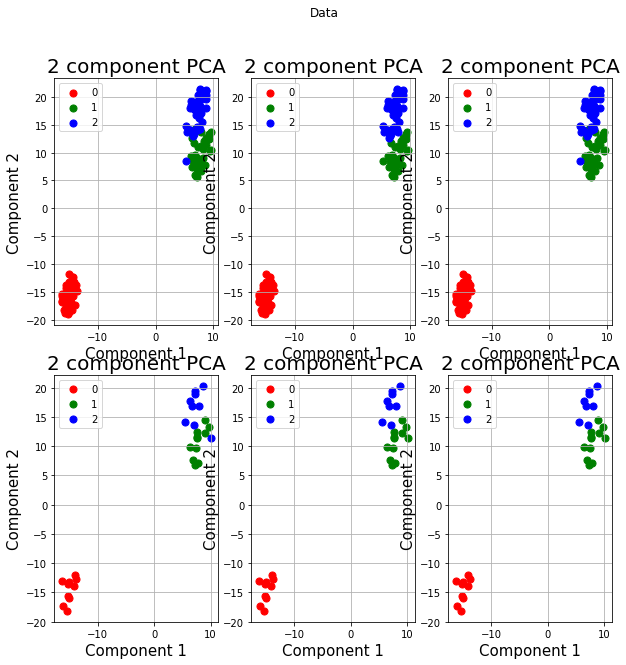

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [55]:
model = KNeighborsClassifier()
model_param =KNeighborsClassifier(algorithm = 'auto',
                    metric = 'minkowski',
                    n_neighbors =  3,
                    p = 3,
                    weights = 'distance')
ans = train_model_2(train,test, model, model_param)
ans

(LogisticRegression(),
 LogisticRegression(C=0.1),
 {'fit_time': array([0.0500896 , 0.02802587, 0.03384757, 0.02116919]),
  'score_time': array([0.00881696, 0.00781131, 0.00796008, 0.00430727]),
  'test_accuracy': array([0.93333333, 1.        , 0.96666667, 1.        ]),
  'test_precision_weighted': array([0.94444444, 1.        , 0.96969697, 1.        ]),
  'test_recall_weighted': array([0.93333333, 1.        , 0.96666667, 1.        ]),
  'test_f1_weighted': array([0.93265993, 1.        , 0.96658312, 1.        ])},
 {'fit_time': array([0.01277113, 0.0145359 , 0.01553774, 0.01763439]),
  'score_time': array([0.00418639, 0.00423789, 0.00428605, 0.00421953]),
  'test_accuracy': array([0.93333333, 1.        , 0.96666667, 1.        ]),
  'test_precision_weighted': array([0.94444444, 1.        , 0.96969697, 1.        ]),
  'test_recall_weighted': array([0.93333333, 1.        , 0.96666667, 1.        ]),
  'test_f1_weighted': array([0.93265993, 1.        , 0.96658312, 1.        ])},
 [0.9666666

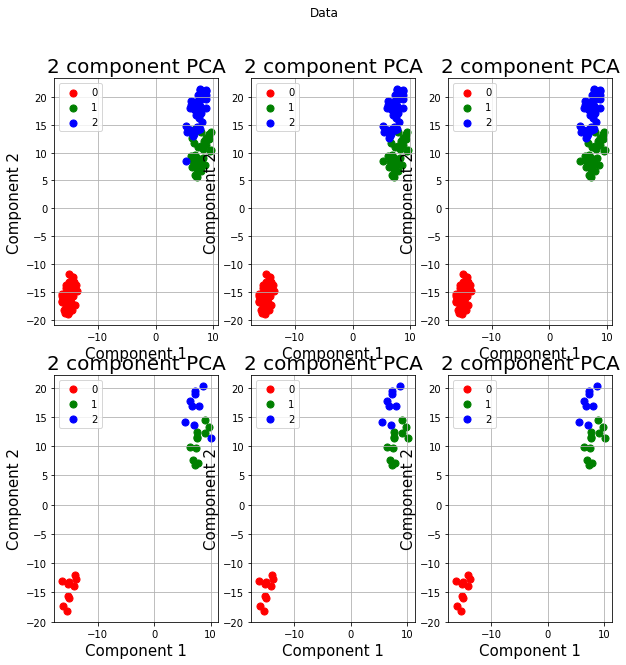

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [57]:
model = LogisticRegression()
model_param = LogisticRegression(C = 0.1, penalty = 'l2') 
ans = train_model_2(train,test, model, model_param)
ans

(DecisionTreeClassifier(),
 DecisionTreeClassifier(splitter='random'),
 {'fit_time': array([0.00317359, 0.00199199, 0.0018723 , 0.00182438]),
  'score_time': array([0.00862098, 0.00423551, 0.00398469, 0.00409436]),
  'test_accuracy': array([0.93333333, 0.93333333, 0.83333333, 0.96666667]),
  'test_precision_weighted': array([0.94444444, 0.94444444, 0.84981685, 0.97      ]),
  'test_recall_weighted': array([0.93333333, 0.93333333, 0.83333333, 0.96666667]),
  'test_f1_weighted': array([0.93265993, 0.93265993, 0.82949702, 0.96675021])},
 {'fit_time': array([0.00173068, 0.00171924, 0.00171566, 0.00186753]),
  'score_time': array([0.00383544, 0.00384235, 0.00386572, 0.00393414]),
  'test_accuracy': array([0.93333333, 0.93333333, 0.93333333, 0.96666667]),
  'test_precision_weighted': array([0.94444444, 0.94444444, 0.93333333, 0.97      ]),
  'test_recall_weighted': array([0.93333333, 0.93333333, 0.93333333, 0.96666667]),
  'test_f1_weighted': array([0.93265993, 0.93265993, 0.93333333, 0.9667

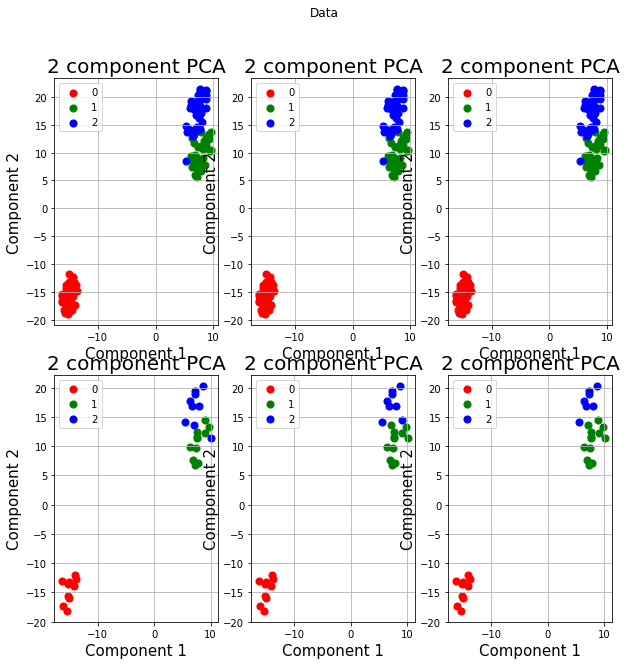

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [58]:
model_param = DecisionTreeClassifier(
    criterion =  'gini',
    min_samples_split = 2,
    splitter = 'random'
)
model= DecisionTreeClassifier() 
ans = train_model_2(train,test, model, model_param)
ans



(SVC(),
 SVC(C=0.1, degree=1, kernel='linear'),
 {'fit_time': array([0.00583482, 0.00248337, 0.00203919, 0.00208426]),
  'score_time': array([0.00504565, 0.00431943, 0.00512934, 0.0042491 ]),
  'test_accuracy': array([0.96666667, 0.96666667, 0.93333333, 0.96666667]),
  'test_precision_weighted': array([0.96969697, 0.96969697, 0.94444444, 0.97      ]),
  'test_recall_weighted': array([0.96666667, 0.96666667, 0.93333333, 0.96666667]),
  'test_f1_weighted': array([0.96658312, 0.96658312, 0.93265993, 0.96675021])},
 {'fit_time': array([0.00187874, 0.00183129, 0.00184155, 0.00191069]),
  'score_time': array([0.00407147, 0.00396085, 0.00405335, 0.00459194]),
  'test_accuracy': array([0.93333333, 1.        , 0.93333333, 1.        ]),
  'test_precision_weighted': array([0.94444444, 1.        , 0.93333333, 1.        ]),
  'test_recall_weighted': array([0.93333333, 1.        , 0.93333333, 1.        ]),
  'test_f1_weighted': array([0.93265993, 1.        , 0.93333333, 1.        ])},
 [0.9333333333

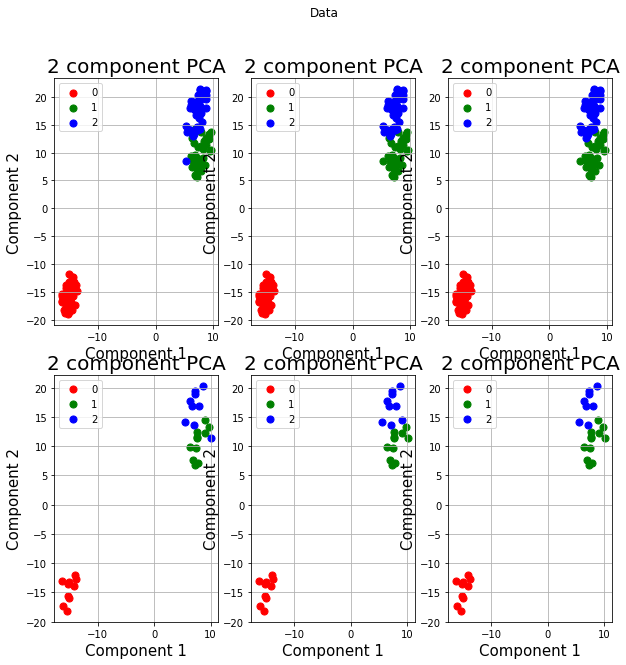

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [60]:
model_param = svm.SVC(
    C = 0.1,
    degree = 1,
    kernel = 'linear'
)
model= svm.SVC() 
ans = train_model_2(train,test, model, model_param)
ans

(GradientBoostingClassifier(),
 GradientBoostingClassifier(learning_rate=0.8080808080808081, n_estimators=21),
 {'fit_time': array([0.38645649, 0.2715764 , 0.19582939, 0.21177077]),
  'score_time': array([0.00846624, 0.00579929, 0.0052309 , 0.00507903]),
  'test_accuracy': array([0.93333333, 0.9       , 0.83333333, 0.96666667]),
  'test_precision_weighted': array([0.94444444, 0.9023569 , 0.84981685, 0.97      ]),
  'test_recall_weighted': array([0.93333333, 0.9       , 0.83333333, 0.96666667]),
  'test_f1_weighted': array([0.93265993, 0.89974937, 0.82949702, 0.96675021])},
 {'fit_time': array([0.04430795, 0.04414439, 0.04112363, 0.04877162]),
  'score_time': array([0.00793982, 0.00599623, 0.0048914 , 0.00494146]),
  'test_accuracy': array([0.93333333, 0.93333333, 0.83333333, 1.        ]),
  'test_precision_weighted': array([0.94444444, 0.94444444, 0.84981685, 1.        ]),
  'test_recall_weighted': array([0.93333333, 0.93333333, 0.83333333, 1.        ]),
  'test_f1_weighted': array([0.

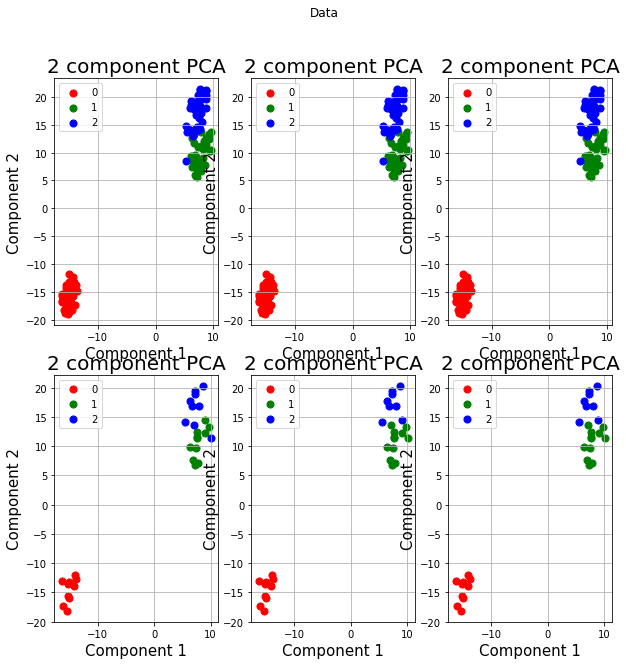

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [65]:
model_param = GradientBoostingClassifier(
    learning_rate = 0.8080808080808081,
    n_estimators = 21
)
model= GradientBoostingClassifier() 
ans = train_model_2(train,test, model, model_param)
ans


(RandomForestClassifier(),
 RandomForestClassifier(max_depth=55, n_estimators=1),
 {'fit_time': array([0.13052893, 0.12873793, 0.12522864, 0.1256001 ]),
  'score_time': array([0.0146811 , 0.01477313, 0.01478529, 0.01827669]),
  'test_accuracy': array([0.96666667, 0.96666667, 0.86666667, 1.        ]),
  'test_precision_weighted': array([0.96969697, 0.96969697, 0.875     , 1.        ]),
  'test_recall_weighted': array([0.96666667, 0.96666667, 0.86666667, 1.        ]),
  'test_f1_weighted': array([0.96658312, 0.96658312, 0.86531987, 1.        ])},
 {'fit_time': array([0.00353146, 0.00439477, 0.00521684, 0.00349808]),
  'score_time': array([0.00457025, 0.00729275, 0.00628471, 0.004457  ]),
  'test_accuracy': array([0.96666667, 0.86666667, 0.8       , 1.        ]),
  'test_precision_weighted': array([0.96969697, 0.9047619 , 0.80555556, 1.        ]),
  'test_recall_weighted': array([0.96666667, 0.86666667, 0.8       , 1.        ]),
  'test_f1_weighted': array([0.96658312, 0.86111111, 0.79797

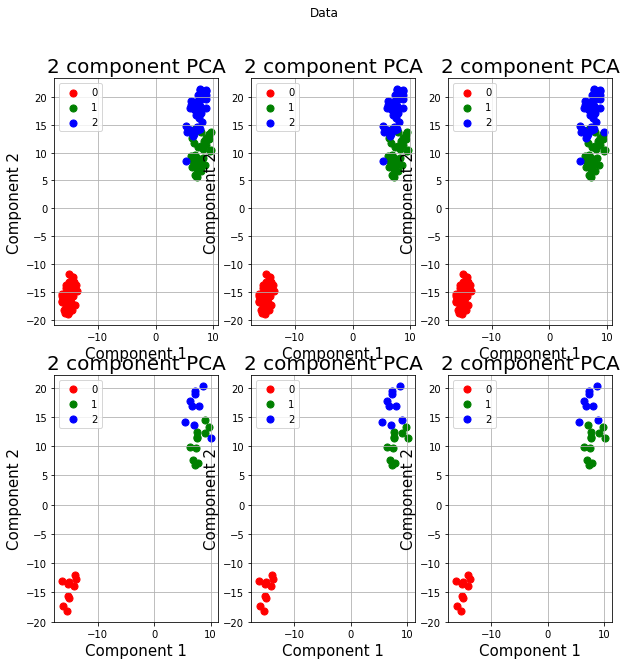

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [69]:
model_param = RandomForestClassifier(
    n_estimators = 1,
    max_depth = 55
)
model= RandomForestClassifier() 
ans = train_model_2(train,test, model, model_param)
ans

Некоторые классификаторы не изменили сви метрики качества, что связано с тем, что найденные параметры равны параметрам по умолчанию. Те же что отличаются, улучшили метрики классификаторов. 

Попробуем радомный посик гиперпараметров

In [67]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":list(range(1,300, 50)),
      "max_depth":list(range(10,100, 5))
      }
model = RandomForestClassifier()
clf = RandomizedSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

{'n_estimators': 151, 'max_depth': 20}

(RandomForestClassifier(),
 RandomForestClassifier(max_depth=20, n_estimators=151),
 {'fit_time': array([0.12732077, 0.12177587, 0.12721181, 0.12336969]),
  'score_time': array([0.01438689, 0.01493454, 0.01549983, 0.02070475]),
  'test_accuracy': array([0.96666667, 0.96666667, 0.9       , 1.        ]),
  'test_precision_weighted': array([0.96969697, 0.96969697, 0.9023569 , 1.        ]),
  'test_recall_weighted': array([0.96666667, 0.96666667, 0.9       , 1.        ]),
  'test_f1_weighted': array([0.96658312, 0.96658312, 0.89974937, 1.        ])},
 {'fit_time': array([0.19473028, 0.19453311, 0.19131088, 0.183321  ]),
  'score_time': array([0.02139235, 0.0205102 , 0.0190413 , 0.01936245]),
  'test_accuracy': array([0.96666667, 0.96666667, 0.86666667, 1.        ]),
  'test_precision_weighted': array([0.96969697, 0.96969697, 0.875     , 1.        ]),
  'test_recall_weighted': array([0.96666667, 0.96666667, 0.86666667, 1.        ]),
  'test_f1_weighted': array([0.96658312, 0.96658312, 0.865

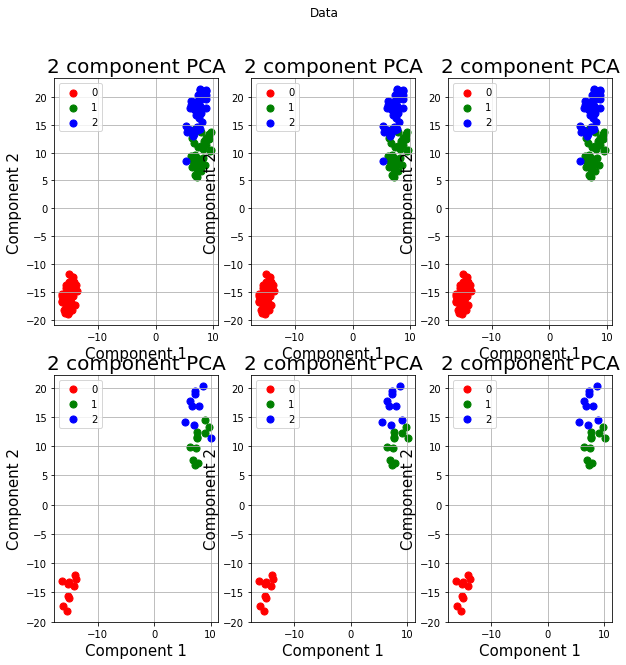

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [68]:
model_param = RandomForestClassifier(
    n_estimators = 151,
    max_depth = 20
)
model= RandomForestClassifier() 
ans = train_model_2(train,test, model, model_param)
ans

In [70]:
grid={"n_estimators":list(range(1,300, 50)),
      "max_depth":list(range(10,100, 5))
      }
model = GradientBoostingClassifier()
clf = RandomizedSearchCV(model, grid)
clf.fit(X, Y)
clf.best_params_

{'n_estimators': 151, 'max_depth': 10}

(GradientBoostingClassifier(),
 GradientBoostingClassifier(max_depth=10, n_estimators=151),
 {'fit_time': array([0.21976423, 0.20998549, 0.20105934, 0.20877266]),
  'score_time': array([0.00534201, 0.00516462, 0.00530934, 0.00503445]),
  'test_accuracy': array([0.93333333, 0.9       , 0.83333333, 0.96666667]),
  'test_precision_weighted': array([0.94444444, 0.9023569 , 0.84981685, 0.97      ]),
  'test_recall_weighted': array([0.93333333, 0.9       , 0.83333333, 0.96666667]),
  'test_f1_weighted': array([0.93265993, 0.89974937, 0.82949702, 0.96675021])},
 {'fit_time': array([0.31436419, 0.28478551, 0.28179574, 0.29601955]),
  'score_time': array([0.00551915, 0.00534797, 0.00513124, 0.00861931]),
  'test_accuracy': array([0.96666667, 0.9       , 0.83333333, 0.96666667]),
  'test_precision_weighted': array([0.96969697, 0.9023569 , 0.86713287, 0.97      ]),
  'test_recall_weighted': array([0.96666667, 0.9       , 0.83333333, 0.96666667]),
  'test_f1_weighted': array([0.96658312, 0.8997493

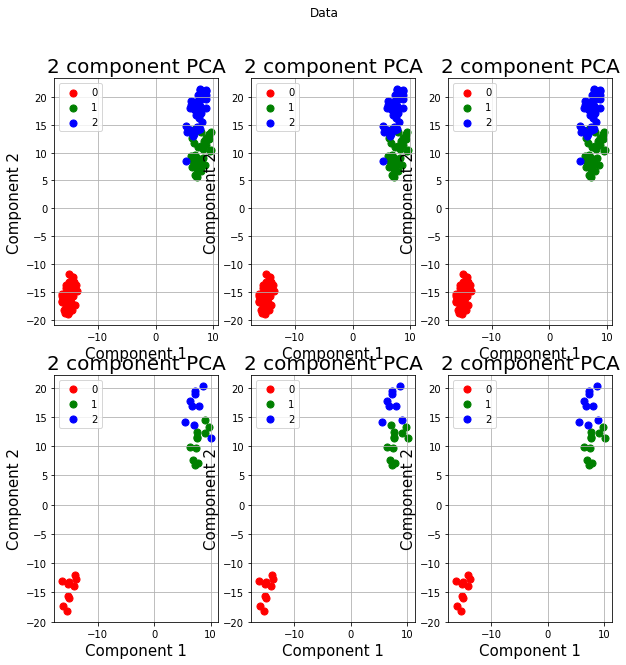

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [72]:
model_param = GradientBoostingClassifier(
    n_estimators = 151,
    max_depth = 10
)
model= GradientBoostingClassifier() 
ans = train_model_2(train,test, model, model_param)
ans

Рандомный поиск работает на таком же уровне, но при этом на несколько порядков быстрее

5. Исследовать возможность проведения классификации данных, содержащихся в датасете: 


In [74]:
mnist = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [80]:
mnist.iloc[:, 1:]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


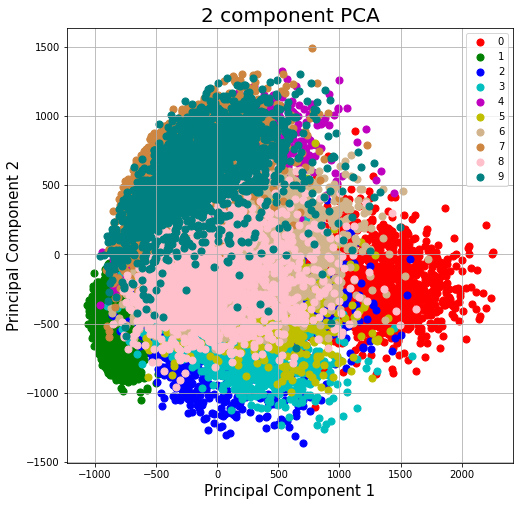

In [88]:
from sklearn.manifold import TSNE
pca = TSNE(n_components=2)
data = mnist.iloc[:, 1:]
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf['target'] = mnist.iloc[:,0]
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2,3,4,5,6,7,8,9]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'tan', 'peru', 'pink', 'teal']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [112]:
model_mnist = RandomForestClassifier()
model_mnist.fit(mnist.iloc[:15000, 1:], mnist.iloc[:15000, 0])


RandomForestClassifier()

In [113]:
answers_mnist = model_mnist.predict(mnist.iloc[15000:, 1:])
y = mnist.iloc[15000:, 0]
metrics_test = []
metrics_test.append(accuracy_score(y, answers_mnist))
metrics_test.append(precision_score(y, answers_mnist, average='weighted'))
metrics_test.append(recall_score(y, answers_mnist, average='weighted'))
metrics_test.append(f1_score(y, answers_mnist, average='weighted'))

In [114]:
metrics_test

[0.9597919583916783, 0.959758754259508, 0.9597919583916783, 0.9597219992697565]